In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.functional import F

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

from auxiliar import *

In [2]:
torch.cuda.is_available()

True

In [9]:
class AstroDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('data.csv')
        self.df = df
        
        images_dir = 'data'
        self.images_dir = images_dir
        
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.df.iloc[idx, 0] + '.fits.fz'
        image_data = fits.getdata(self.images_dir + '/' + img_name)
        
        fwhm_index = self.df.columns.get_loc('FWHM')
        label = self.df.iloc[idx, fwhm_index]
        
        return image_data, label
    
    def __len__(self):
        return len(self.df)
    
    

In [10]:
astro_dataset = AstroDataset()

[0.         0.         0.         ... 0.00055736 0.00044423 0.00029422]


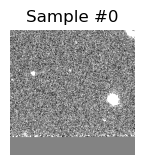

[0.         0.         0.         ... 0.00055736 0.00044423 0.00029422]


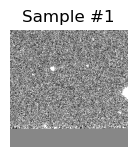

[0.         0.         0.         ... 0.00055736 0.00044423 0.00029422]


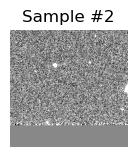

[0.         0.         0.         ... 0.00055736 0.00044423 0.00029422]


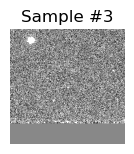

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i, sample in enumerate(astro_dataset):
    print(sample[1])
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plot_fits(sample[0])

    if i == 3:
        plt.show()
        break

In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x